In [1]:
print('Hello world!')

Hello world!


In [2]:
import numpy as np

vec1 = np.array([3., 4.]) # create a vector with given entries
vec2 = np.random.randn(3) # create a random vector
print(vec1)
print(vec2)

[3. 4.]
[-1.44199414  1.35026029  0.61578085]


In [17]:
mat1 = np.array([[1.,2.],[3., 4.]]) # create a matrix with given entries
mat2 = np.random.randn(3,3) # create a random 3x3 matrix
print(mat1)
print(mat2)

[[1. 2.]
 [3. 4.]]
[[ 0.33677533  1.01976486  0.17641114]
 [ 0.6424688  -0.20037174  0.24244065]
 [ 1.21635935  0.16948958 -0.0507967 ]]


In [9]:
prod1 = mat1 @ mat1 # multiply mat1 by mat1 # mat1 乘 mat1
prod2 = mat1 * mat1 # elementwise product between mat1 by mat1 # mat1 与 mat1 之间的元素乘积
prod3 = mat1 @ vec1 # multiply mat1 by vec1 # 用 vec1 乘 mat1
prod4a = vec2.T @ vec2 # dot product between vec2 and vec2 # vec2 和 vec2 之间的点积
prod4b = vec2.dot(vec2) # dot product between vec2 and vec2 # vec2 和 vec2 之间的点积
prod5 = np.outer(vec2, vec2) # Outer product between vec2 and vec2 # vec2 和 vec2 的外积
prod6 = vec2 @ vec2.T
print(prod4a)
print(prod4b) # Display two of the results # 显示两个结果

2.2449171265861243
2.2449171265861243


In [36]:
vec3 = np.random.randn(3)
print(vec3)
# stack vec2 and vec3 to obtain a matrix of shape (2,3) np.stack:按照新轴连接数组的序列
stacked1 = np.stack([vec2, vec3])  # 按照轴 0 连接 vec2 和 vec3
stacked2 = np.hstack([vec2, vec3])  # 按顺序水平堆叠数组（按列排列）,不要看pycharm
stacked2_1 = np.stack([vec2, vec3], axis=1)  # 按照轴 1 连接 vec2 和 vec3
stacked3 = np.vstack([vec2, vec3])  # 按顺序垂直（按行）堆叠数组
stacked3_1 = np.stack([vec2, vec3], axis=0)  # 按照轴 0 连接 vec2 和 vec3

print(vec2, vec3)
print(vec2.shape)
print(stacked1.shape)
print('stack堆叠，stacked1:', stacked1)
print('hstack水平堆叠，stacked2:', stacked2)
print('vstack垂直堆叠，stacked3:', stacked3)

# stack mat2 and vec2 to obtain a matrix of shape (4,3)
concatenated1 =  np.vstack([mat2, vec2[None]])  # vec2[None, :] 会在第一个维度上增加一个新的轴，结果形状为 (1, 4)
# stack mat2 and vec2 to obtain a matrix of shape (3,4)
concatenated2 =  np.hstack([mat2, vec2[:,None]])  # vec2[:, None] 会在第二个维度上增加一个新的轴，结果形状为 (4, 1)
print(stacked1.shape) # display the matrix dimension of stacked1

print('vec2[None]', vec2[None])
print('vec2[:,None]', vec2[:,None])

[ 0.97288705 -0.72992034 -1.32926631]
[ 0.99127107  1.09213008 -0.26372463] [ 0.97288705 -0.72992034 -1.32926631]
(3,)
(2, 3)
stack堆叠，stacked1: [[ 0.99127107  1.09213008 -0.26372463]
 [ 0.97288705 -0.72992034 -1.32926631]]
hstack水平堆叠，stacked2: [ 0.99127107  1.09213008 -0.26372463  0.97288705 -0.72992034 -1.32926631]
vstack垂直堆叠，stacked3: [[ 0.99127107  1.09213008 -0.26372463]
 [ 0.97288705 -0.72992034 -1.32926631]]
(2, 3)
vec2[None] [[ 0.99127107  1.09213008 -0.26372463]]
vec2[:,None] [[ 0.99127107]
 [ 1.09213008]
 [-0.26372463]]


In [1]:
import numpy as np

mat = np.diag([0.1, 0.2, 0.3]) # set diagonal matrix # 设置对角矩阵
mat_inv = np.linalg.inv(mat) # matrix inversion # 矩阵反转
print('mat:\n', mat)
print('mat_inv:\n', mat_inv)
# # Let's make it not invertible by changing the last entry to 0 # # 将最后一项改为 0，使其不可逆
# mat[-1,-1] = 0.

# Let's check if the matrix is invertible (without inverting it) # 让我们检查矩阵是否可逆（无需反转）
is_invertible = np.linalg.det(mat) != 0.

# Pseudoinverses of mat # Mat 的伪逆
mat1_pinv = np.linalg.inv(mat.T @ mat) @ mat.T # using inv(A.T @ A) @ A.T
mat2_pinv = np.linalg.pinv(mat) # using np.linalg.pinv()

#Compare the two solutions
diff = np.linalg.norm(mat1_pinv - mat2_pinv, ord='fro')

print(is_invertible)
print(diff) # diff should be almost zero # diff应该接近于零

mat:
 [[0.1 0.  0. ]
 [0.  0.2 0. ]
 [0.  0.  0.3]]
mat_inv:
 [[10.          0.          0.        ]
 [ 0.          5.          0.        ]
 [ 0.          0.          3.33333333]]
True
4.440892098500626e-16


In [7]:
import numpy as np

A = np.random.randn(3,3)
b = np.random.randn(3)

is_invertible = np.linalg.det(A) != 0.
A_pinv = np.linalg.pinv(A)
A_inv = np.linalg.inv(A)
x = A_pinv@b
diff = np.linalg.norm(A@x-b, ord=2)

print(is_invertible)
print(diff)
print('A_inv:', A_inv)
print('A_pinv:', A_pinv)

True
3.608224830031759e-16
A_inv: [[ 1.01959222e-04  3.57838909e-01  5.55043194e-01]
 [ 4.10398901e-01  1.12857685e-02  7.68087262e-01]
 [ 2.65217500e-01  1.04643477e-01 -6.43688290e-01]]
A_pinv: [[ 1.01959222e-04  3.57838909e-01  5.55043194e-01]
 [ 4.10398901e-01  1.12857685e-02  7.68087262e-01]
 [ 2.65217500e-01  1.04643477e-01 -6.43688290e-01]]


In [8]:
def fun(x):
    # x_inv = ...
    return x_inv

x = np.diag([1., 2, 0.])
y = fun(x)
print(y)

NameError: name 'x_inv' is not defined

Figure(500x500)


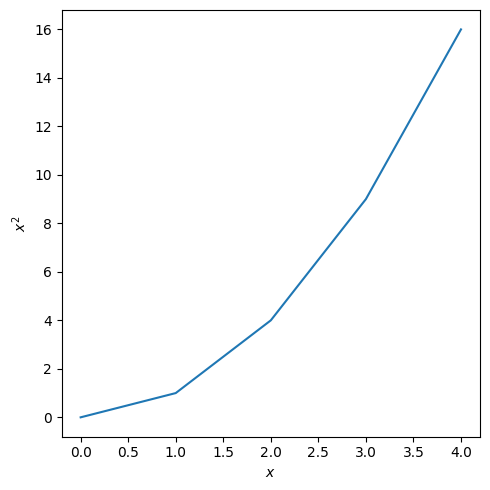

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(5) # create data
fig,ax = plt.subplots(figsize=(5,5))
ax.plot(x, x**2) # plot data in a graph
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$x^2$')
fig.tight_layout()
print(fig)